<a href="https://colab.research.google.com/github/didlaak/python/blob/main/ex01_Keras%EB%A7%9B%EB%B3%B4%EA%B8%B0(%ED%95%99%EC%83%9D%EC%84%B1%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 오늘의 목표
- 학생 성적 데이터를 인공신경망 모델로
학습시켜보자!
- keras 활용법 숙지

In [ ]:
!ls # 현재 작업 폴더의 내부(폴더, 파일) 살펴보기

drive  sample_data


In [ ]:
!pwd # 현재 작업폴더 경로 확인

/content


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!ls

 data  'ex01.Keras맛보기(학생성적데이터_회귀).ipynb'


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks


데이터로딩

In [ ]:
import pandas as pd

In [ ]:
# 구분자 - 데이터가 ; 로 저장되어 있음
studentData=pd.read_csv('./data/student-mat.csv', delimiter=";")

In [ ]:
studentData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
from sklearn.model_selection import train_test_split

문제와 답 분리 

In [ ]:
X = studentData['studytime'] # studytime
y = studentData['G3']# G3

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((296,), (99,), (296,), (99,))

### 신경망 모델 만들기
 1. 신경망 구조 설계
 2. 신경망 모델 학습(loss, optimizer) / 평가
 (metrics)방법 설정
 3. 학습 및 학습과정 시각화
 4. 모델평가

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [ ]:
# 1. 신경망 구조설계
model = Sequential() # 딥러닝 모델을 구성하는 

model.add(InputLayer(input_shape=(1,)))   # 입력층 설정
model.add(Dense(units=6))
model.add(Dense(units=5))
model.add(Dense(units=9))
model.add(Dense(units=1)) # 마지막 유닛은 무조건 1개로 지정해줘야됨
                          # 출력층

In [ ]:
# 2. 신경망 모델 학습(loss, optimizer) / 평가 (metrics)방법 설정
# 모델을 직접 설계했기 떄문에 직접 적어줘야함

model.compile(loss='mean_squared_error',
              optimizer='SGD')

In [ ]:
# 3. 학습 및 학습과정 시각화
studentHistory = model.fit(X_train,y_train, epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 73.1513
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 81.7706
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 32.2850
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 32.5599
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 25.1004
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 19.2744
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 19.2912
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 20.9428
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 18.1117
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 18.9491
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 18.0843
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 18.2623
Epoch 13/100
10/10 [=====

In [ ]:
import matplotlib.pyplot as plt

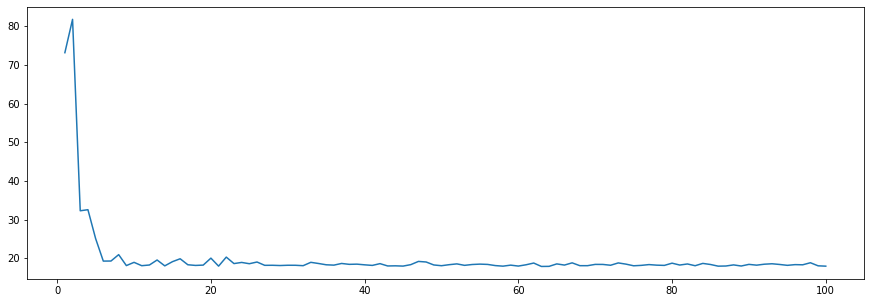

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(range(1, 101),
         studentHistory.history['loss'],
         label=['loss'])
plt.show()

In [ ]:
# 4. 모델 평가
model.evaluate(X_test,y_test)

4/4 [==============================] - 1s 3ms/step - loss: 29.5877


29.587677001953125

In [ ]:
# 5. 모델 예측
model.predict(X_test[:0])

NameError: ignored